# Rotating edge experiment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection
from lineart.shapes import Octahedron

In [3]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [4]:
edges

array([[[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]]])

## split edges

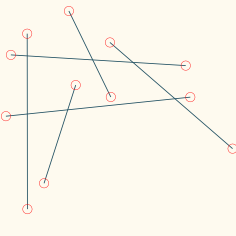

In [5]:
edges = np.random.rand(6,2,3)*100
Image(draw.draw_edges(edges, v=True))

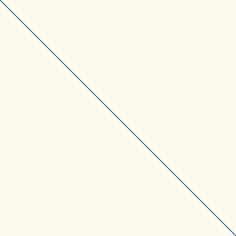

In [6]:
Image(draw.draw_edges(e*100))

In [7]:
def split(e, n):
    fracs = np.random.rand(n, 1)
    fracs.sort(axis=0)
    vector = e[1] - e[0]
    splits = np.multiply(fracs[::-1], vector) + e[0]
    points = np.concatenate((e[1].reshape(1,3),splits,e[0].reshape(1,3)))
    starts = points[:-1]
    ends = points[1:]
    edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)
    return edges

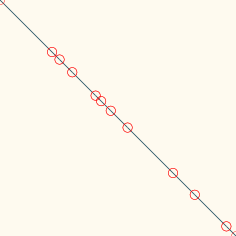

In [8]:
splits = split(e*100,10)

Image(draw.draw_edges(splits, v=True))

In [9]:
splits.shape

(11, 2, 3)

In [10]:
split_collection = EdgeCollection(splits, np.random.randn(*splits[:,0,:].shape), np.arange(splits.shape[0])/30)

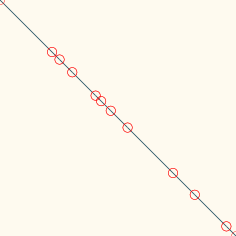

In [11]:
Image(draw.draw_edges(split_collection.edges, v=True))

In [12]:
c = np.repeat(split_collection.centers[:, np.newaxis, :], 2, axis=1)

In [13]:
split_collection.n 

11

rot_mat.shape=(11, 3, 3)
edge_centers.shape=(11, 2, 3)
centers_shifted.shape=(11, 2, 3)
rotated.shape=(11, 2, 3)
back_shifted.shape=(11, 2, 3)


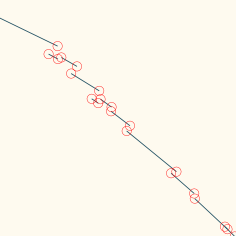

In [14]:
split_collection.step(1)
# split_collection.rotate_indiv(np.pi/50)
Image(draw.draw_edges(split_collection.edges, v=True))

### Octahedron test

In [15]:
ocatahedron = Octahedron(np.array([50, 50, 40]), 40)

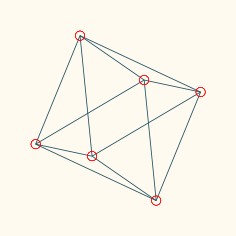

In [31]:
Image(draw.draw_edges(ocatahedron.edges, v=True).png())

In [27]:
ocatahedron.rotate_unison(np.array([[50, 50, 40]]), np.array([1, 1, 1]), np.pi * 2/20)

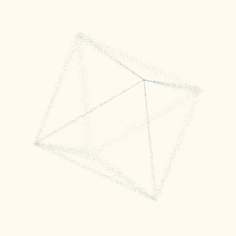

In [32]:
Image(draw.draw_zsampled_edges(ocatahedron.edges, n=1000, scatter=0.01).png())